In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering , DBSCAN , KMeans

from sklearn.metrics import silhouette_score

from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import dendrogram , cophenet , linkage

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rcParams['figure.figsize'] = [15,8]


In [22]:
df = pd.read_csv("cancer.csv")
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [23]:
df.shape

(699, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    int64  
 1   ClumpThickness               699 non-null    int64  
 2   Cell Size                    699 non-null    int64  
 3   Cell Shape                   699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  699 non-null    object 
 7   Normal Nucleoli              699 non-null    int64  
 8   Bland Chromatin              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
 11  Unnamed: 11                  0 non-null      float64
 12  Unnamed: 12                  0 non-null      float64
 13  Unnamed: 13         

In [26]:
df["Bare Nuclei"] = df["Bare Nuclei"].replace("?" ,np.nan)

In [43]:
df["Bare Nuclei"] = df["Bare Nuclei"].astype("float")

In [44]:
df.dtypes

ID                               int64
ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
Unnamed: 11                    float64
Unnamed: 12                    float64
Unnamed: 13                    float64
dtype: object

In [45]:
df.isnull().sum()

ID                               0
ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion                0
Single Epithelial Cell Size      0
Bare Nuclei                     16
Normal Nucleoli                  0
Bland Chromatin                  0
Mitoses                          0
Class                            0
Unnamed: 11                    699
Unnamed: 12                    699
Unnamed: 13                    699
dtype: int64

In [47]:
df = df.dropna(subset = ["Bare Nuclei"])

In [48]:
df.isnull().sum()

ID                               0
ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion                0
Single Epithelial Cell Size      0
Bare Nuclei                      0
Normal Nucleoli                  0
Bland Chromatin                  0
Mitoses                          0
Class                            0
Unnamed: 11                    683
Unnamed: 12                    683
Unnamed: 13                    683
dtype: int64

In [49]:
df.drop(["Unnamed: 11" , "Unnamed: 12" , "Unnamed: 13" , "ID"] , axis = 1 , inplace = True)

C:\Users\juhib\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
df.dtypes

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [51]:
df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


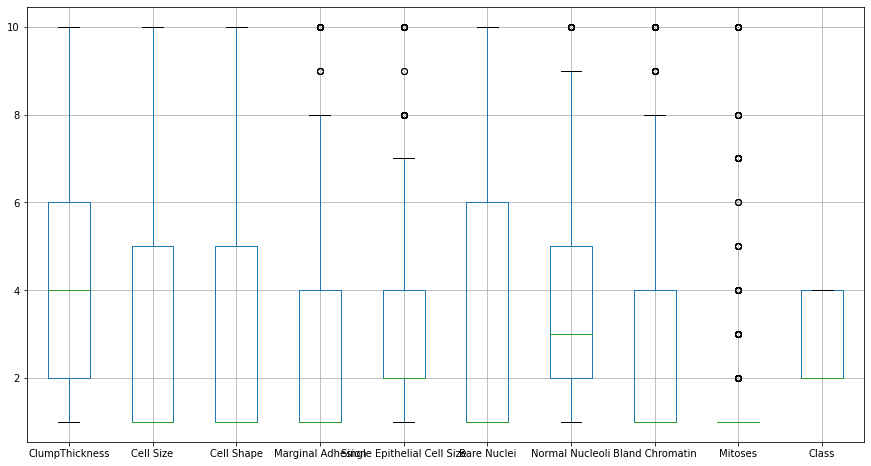

In [57]:
df.boxplot()
plt.show()

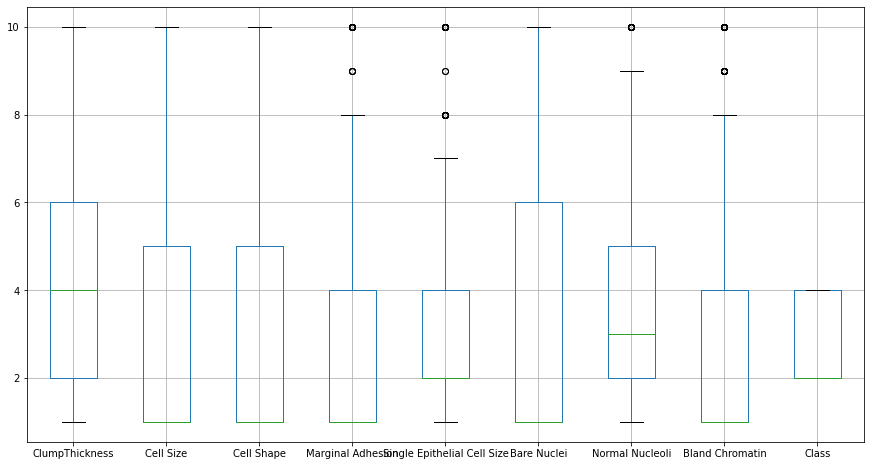

In [58]:
df.drop("Mitoses" , axis = 1).boxplot()
plt.show()

In [59]:
ss = StandardScaler()


scaled_num = ss.fit_transform(df)

In [60]:
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [61]:
cov_mat = np.cov(scaled_num.T)

cov_mat

array([[1.00146628, 0.64342355, 0.65442815, 0.48854401, 0.52436377,
        0.59396107, 0.55455439, 0.534849  , 0.35147177, 0.71583801],
       [0.64342355, 1.00146628, 0.90855848, 0.70801357, 0.75464892,
        0.69272299, 0.75666702, 0.7204008 , 0.46143029, 0.82200496],
       [0.65442815, 0.90855848, 1.00146628, 0.68695385, 0.72352174,
        0.71492429, 0.73642172, 0.71901615, 0.44190459, 0.82309607],
       [0.48854401, 0.70801357, 0.68695385, 1.00146628, 0.59541954,
        0.67163165, 0.66954737, 0.6040054 , 0.41951256, 0.70732976],
       [0.52436377, 0.75464892, 0.72352174, 0.59541954, 1.00146628,
        0.58657495, 0.61903424, 0.62984858, 0.48128796, 0.69197129],
       [0.59396107, 0.69272299, 0.71492429, 0.67163165, 0.58657495,
        1.00146628, 0.68161283, 0.58513691, 0.33970781, 0.82390217],
       [0.55455439, 0.75666702, 0.73642172, 0.66954737, 0.61903424,
        0.68161283, 1.00146628, 0.66657749, 0.34651824, 0.75933933],
       [0.534849  , 0.7204008 , 0.7190161

In [62]:
cov_mat.shape

(10, 10)

In [63]:
eig_val , eig_vec = eig(cov_mat)

In [64]:
print("Eigen values: ",'\n' ,'\n' , eig_val , '\n')
print("Eigen Vectors: ",'\n', '\n' , eig_vec , '\n')

Eigen values:  
 
 [6.74104807 0.79431679 0.54676869 0.08801629 0.12652647 0.46598094
 0.38093921 0.26160244 0.31300154 0.29646232] 

Eigen Vectors:  
 
 [[-2.85506718e-01 -1.46167143e-01  8.33524250e-01 -2.20075753e-02
  -1.65578903e-01  2.68464713e-03  6.72601786e-02 -2.50789617e-01
  -3.21398968e-01 -6.11050718e-02]
 [-3.55249609e-01 -1.37350504e-02 -5.82556917e-02 -7.37430298e-01
   1.19332759e-02 -2.25302438e-01 -1.48043687e-01  4.46355674e-01
  -1.91384210e-01  1.33154291e-01]
 [-3.52735271e-01 -5.21791553e-02 -4.06896100e-03  6.49526922e-01
  -1.95526758e-01 -2.00725525e-01 -1.10676884e-01  5.82926342e-01
  -1.13407317e-01  8.67076944e-02]
 [-3.09813387e-01 -1.82103380e-02 -4.06761253e-01  4.34869161e-02
  -3.97884770e-03  4.85833118e-01 -3.16764282e-02 -1.44012163e-01
  -5.95654264e-01 -3.51769339e-01]
 [-3.11690413e-01  1.96432396e-01 -1.22536433e-01  6.26472658e-02
  -3.36857264e-02 -4.24402256e-01 -6.31291442e-01 -4.66543019e-01
   1.42743349e-01 -1.65845115e-01]
 [-3.183136

In [65]:
eig_val = list(eig_val)

eig_val.sort(reverse=True)

print(eig_val)

[6.7410480687704935, 0.7943167897416815, 0.5467686879049735, 0.4659809423417309, 0.3809392112710513, 0.31300154143089537, 0.2964623191990775, 0.2616024447414571, 0.12652646561309233, 0.08801628558378512]


In [66]:
per_val = []

for i in eig_val:
    variation = (i/sum(eig_val))*100
    per_val.append(variation)
    
per_val

[67.31178305858678,
 7.931538076190729,
 5.459681480983777,
 4.652986862036024,
 3.803814671842709,
 3.125432668460771,
 2.960282601665752,
 2.6121942505662337,
 1.2634121456534257,
 0.878874184013784]

In [67]:
np.cumsum(per_val)

array([ 67.31178306,  75.24332113,  80.70300262,  85.35598948,
        89.15980415,  92.28523682,  95.24551942,  97.85771367,
        99.12112582, 100.        ])

We will take 4 componenet to get the 85 percent variation in the data.

In [68]:
eigen_vec = eig_vec[:,[0,1,2,5]]

In [69]:
df_pac = pd.DataFrame(scaled_num.dot(eigen_vec) , columns = ['PC1' , 'PC2' , 'PC3' , 'PC4'])

df_pac

,PC1,PC2,PC3,PC4
0,1.633335,-0.101183,0.531049,-0.048710
1,-1.092753,-0.367917,-0.376358,0.337524
2,1.748495,-0.068406,-0.054569,0.084486
3,-1.124403,-0.305836,0.320435,-1.605072
4,1.518159,-0.062050,-0.048867,0.289788
...,...,...,...,...
678,1.872384,0.176924,0.089448,-0.106953
679,2.201403,0.211291,-0.156912,-0.051959
680,-4.017701,-0.020681,-0.854176,-2.433909
681,-2.579000,-1.079710,-1.084581,-0.586056
